In [1]:
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from BoreholeFlow import BhFlow
from BoreholeFlow import PlotFigures
import quadprog as qp
np.set_printoptions(precision=15)

In [2]:
# Created by Joshua Thompson 
# Last updated 09/02/2022
Rw = 20.32 / 2
R0 = 1000

path_well_299_W15_225 = r"..\Input_Data\well_299_W15_225.txt"
flowlog = pd.read_csv(path_well_299_W15_225, header = None, sep = '\s+')

ztop = np.asarray(-flowlog.iloc[:, 0]).reshape(31, 1)
zbot = np.asarray(-flowlog.iloc[:, 1]).reshape(31, 1)
Qr = np.asarray(flowlog.iloc[:, 2]).reshape(31, 1)
Qb = np.asarray(flowlog.iloc[:, 3]).reshape(31, 1)

zwellbot = -np.min(zbot)
nlayers = len(Qb)

b = ztop - zbot

zmid = []
for i in range(len(ztop)):
    zm = np.mean((ztop[i], zbot[i]), dtype=np.float64)
    zmid.append(zm)
zmid = np.asarray(zmid)

Qerror = np.sum(Qr)
if(Qerror> 1e-5):
    print('borehole flows do not balance')
    
nskip = 2

Qsampling = np.zeros((1,1))
zpump = zmid[0]
Qpump = np.zeros((1,1))
zobs = np.asarray(zmid[0:31:nskip]).reshape(16, 1)
C0 = np.ones((nlayers, 1))

p = BhFlow(np.zeros((1,1)), R0, Rw)

# Create empty list to store data
ctrueAll, cobsAll, gAll, zobsAll, zpumpAll, QpumpAll, QobsAll, QbAll, QrAll, hAll = p.MakeDataLists()

for i in range(len(zobs)):
 # Run transport model
    c, cobs, G = p.BoreholeTransportModel(nlayers, b, Qb, Qr, C0, ztop, zmid, zbot, zobs[i], zpump, Qpump, Qsampling)
    # Append data to empty lists
    gAll.append(G)
gAll = np.asarray(gAll)
gAll = gAll.reshape(16, 31)

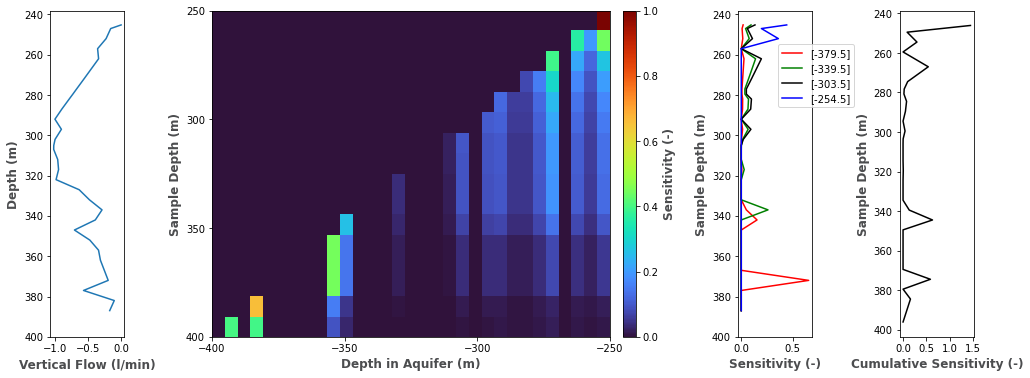

In [3]:
plot = PlotFigures()
plot.PlotFigure6(Qb, zobs, zmid, ztop, gAll)

In [4]:
# -----------------------------------------------------
# EXPORTING FOR DATA VALIDATION
# -----------------------------------------------------
# path = r'C:\Users\thom675\OneDrive - PNNL\summer_internship_2022\borehole flow\Python\python_output'
# file_name = '\Python_Output_Fig6_Gmatrix.txt'

# np.savetxt(path + file_name, gAll)